# <span style='color:#FF8383'>Assignment 18</span>
## <span style='color:#6A9C89'>Artificial Neural Networks </span>

### <span style='color:#6A9C89'>Overview</span>
##### In this assignment, we will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
print('Libraries Imported')

Libraries Imported


In [22]:
## importing dataset
df = pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### <span style='color:#6A9C89'>Data Exploration and Pre-Processing</span>

In [23]:
## information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [24]:
## description about the data
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [25]:
letters_present = list(df.letter.unique())
letters_present.sort()
print(letters_present, )
print(f'Number of Letters present => {len(letters_present)}')

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of Letters present => 26


In [26]:
rows, columns = df.shape
print(f'Rows => {rows}')
print(f'Columns => {columns}')

Rows => 20000
Columns => 17


In [27]:
df_columns = df.columns
df_columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [28]:
measures = ['width', 'height', 'onpix']
x_measures = [x for x in df_columns if x[0]=='x']
y_measures = [x for x in df_columns if x[0]=='y']

In [29]:
print(f'Number of measurement for letters => {len(measures)}')
print(f'Number of X measurement for letters => {len(x_measures)}')
print(f'Number of Y measurement for letters => {len(y_measures)}')
print(f'Number of total measurements => {len(measures) + len(x_measures) + len(y_measures)}')

Number of measurement for letters => 3
Number of X measurement for letters => 8
Number of Y measurement for letters => 5
Number of total measurements => 16


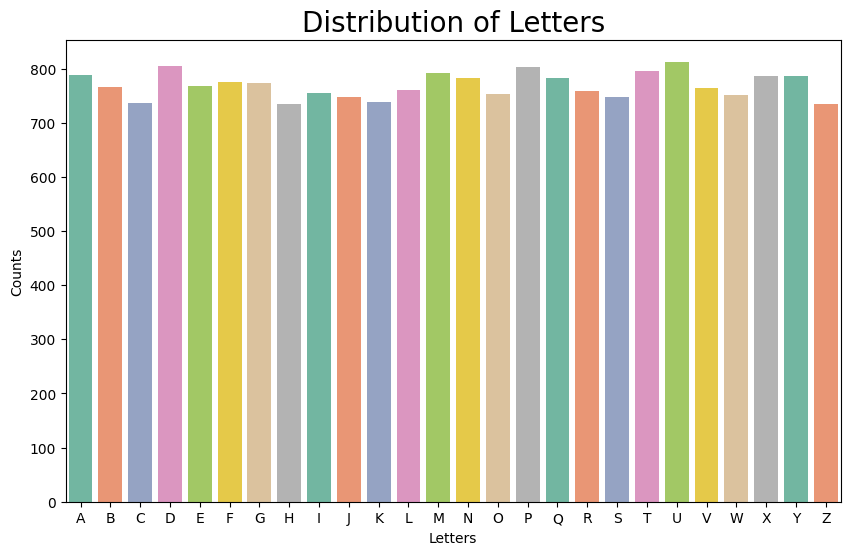

In [30]:
letter_count_df = pd.DataFrame(df.letter.value_counts())
letter_count_df = letter_count_df.reset_index()
letter_count_df = letter_count_df.rename(columns= {'index': 'letters', 'letter':'counts'})
letter_count_df = letter_count_df.sort_values(by='letters')
plt.figure(figsize=(10,6))
plt.title('Distribution of Letters', fontsize=20)
sns.barplot(data=letter_count_df, x='letters', y='counts', palette='Set2')
plt.xlabel('Letters')
plt.ylabel('Counts')
plt.show()

In [31]:
## executing necessary data preprocessing steps including data normalization, managing missing values
### null values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [32]:
## separating the dataset into independed and dependent variables
x = df.drop(columns='letter', axis=1)
y = df.letter

In [33]:
## label encoding dependent variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### <span style='color:#6A9C89'>Model Implementation</span>

In [34]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [35]:
## applying Standard Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
import datetime

In [37]:
model = Sequential([
    Dense(64, input_dim=16, activation='relu'),  # Input layer with 16 features and 1 hidden layer
    Dense(32, activation='relu'),               # Second hidden layer
    Dense(len(le.classes_), activation='softmax')  # Output layer with softmax for classification
])

In [38]:
## construct an optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
categorical_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [39]:
## Complie the model
model.compile(optimizer=opt, 
              loss=categorical_loss, 
              metrics=['accuracy'])

In [40]:
## set up the tesorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [41]:
## setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:
## Train the Model
history = model.fit(x_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    callbacks=[early_stopping, tensorflow_callback], 
                    batch_size=32, 
                    verbose=1)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2989 - loss: 2.3568 - val_accuracy: 0.6281 - val_loss: 1.2357
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6598 - loss: 1.1301 - val_accuracy: 0.6950 - val_loss: 1.0110
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7233 - loss: 0.8974 - val_accuracy: 0.7500 - val_loss: 0.8169
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 6237s 16s/step - accuracy: 0.7640 - loss: 0.7729 - val_accuracy: 0.7312 - val_loss: 0.8572
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7856 - loss: 0.6924 - val_accuracy: 0.7922 - val_loss: 0.6734
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8162s 20s/step - accuracy: 0.7963 - loss: 0.6443 - val_accuracy: 0.7891 - val_loss: 0.6461
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7959 - loss: 0.6307 - val_accuracy: 0.7997 - val_loss: 0.6342
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.5835 - va

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,080 (47.19 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,054 (31.46 KB)

In [44]:
## enabling tensorboard 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [45]:
## start tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3548), started 10:14:28 ago. (Use '!kill 3548' to kill it.)

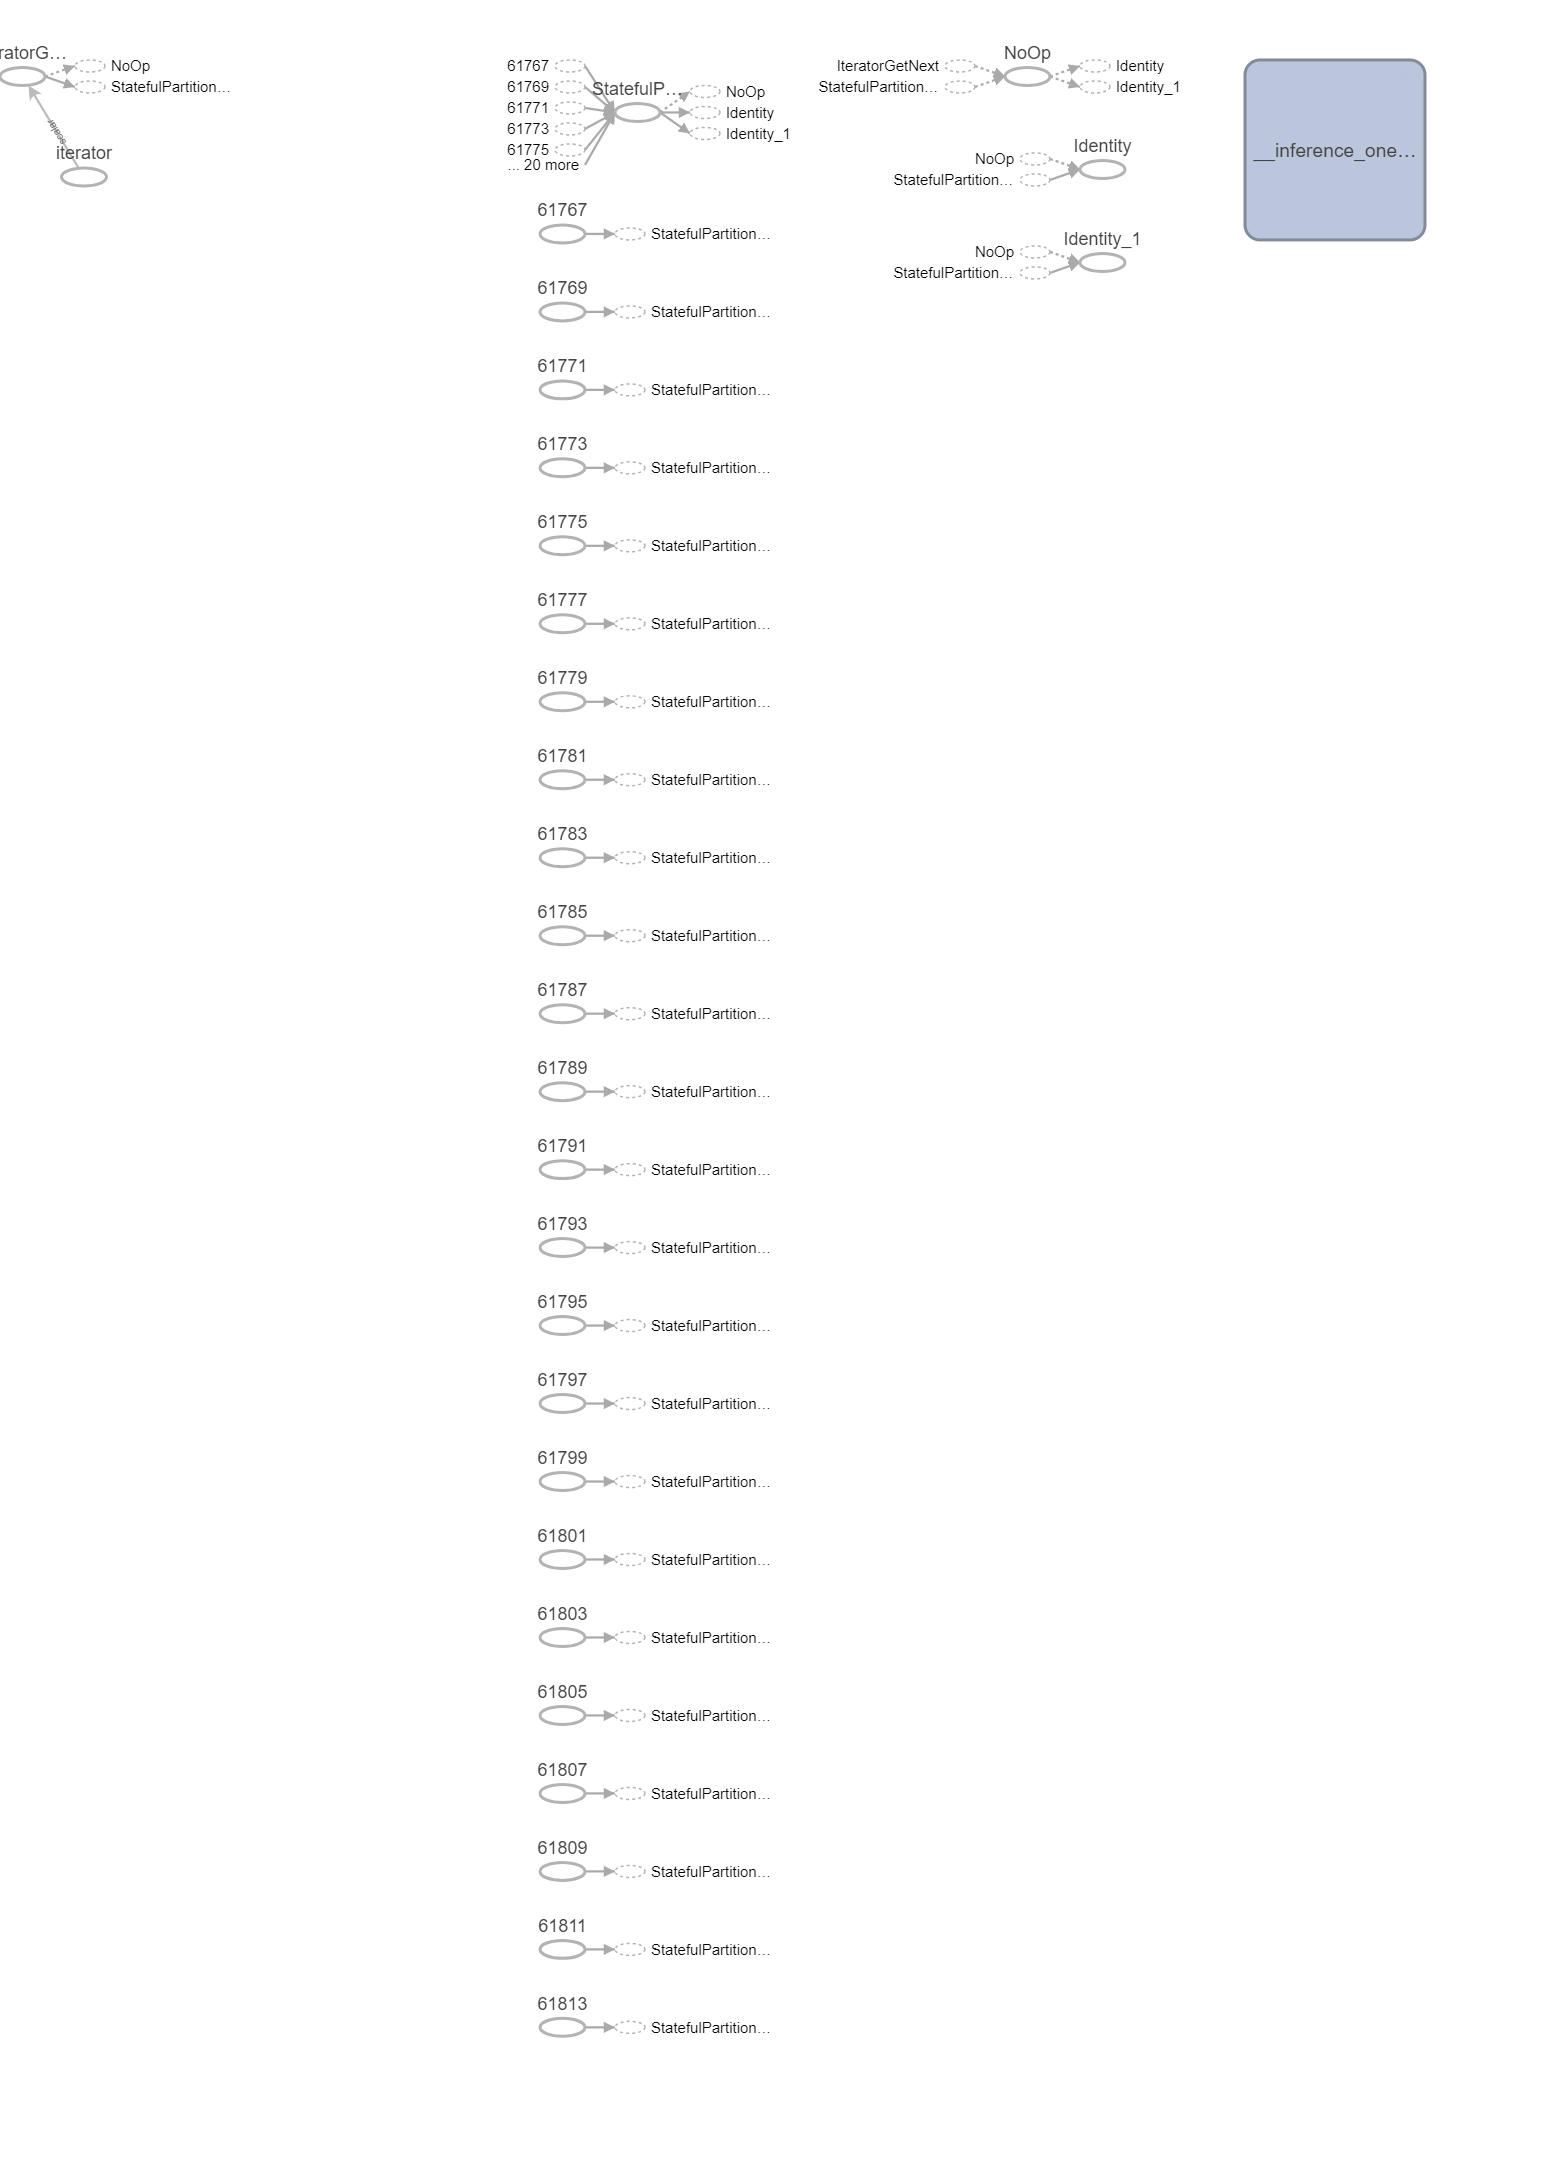

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
test_loss, test_accuracy

(0.34036141633987427, 0.8914999961853027)

### <span style='color:#6A9C89'>Hyper-Parameter Tuning</span>

In [47]:
## defining hyper-parameters
hidden_layers = [1,2,3,4]
neurons_per_layer = [32, 64, 128, 256]
activation_functions = ['relu', 'sigmoid']
learning_rate = [0.001, 0.01, 0.1]

In [48]:
best_accuracy = 0
best_params = {}

# Tracking all combinations of hyperparameters
for hidden_layer in hidden_layers:
    for neurons in neurons_per_layer:
        for activation in activation_functions:
            for lr in learning_rate:
                print(f'Training with [{hidden_layer}] hidden layers, {neurons} neurons, {activation} activation function, and {lr} learning rate')
                
                # Building the model
                model = Sequential()
                model.add(Dense(neurons, activation=activation, input_dim=16))  # Input layer
                
                # Adding hidden layers
                for _ in range(hidden_layer):
                    model.add(Dense(neurons, activation=activation))  # Hidden layers
                
                # Output layer
                model.add(Dense(len(le.classes_), activation='softmax'))  # Output layer
                
                # Compiling the model
                optimizer = Adam(learning_rate=lr)
                model.compile(optimizer=optimizer,
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                
                # Training the model
                history = model.fit(x_train, 
                                    y_train,
                                    validation_split=0.2,
                                    epochs=10,
                                    batch_size=32,
                                    verbose=1)
                
                # Tracking validation accuracy
                val_accuracy = max(history.history['val_accuracy'])
                print(f'Validation Accuracy: {val_accuracy:.4f}')
                
                # Update the best model if this configuration is better
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_params = {
                        'hidden_layers': hidden_layer,
                        'neurons': neurons,
                        'activation': activation,
                        'learning_rate': lr
                    }

Training with [1] hidden layers, 32 neurons, relu activation function, and 0.001 learning rate
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1039 - loss: 3.1380 - val_accuracy: 0.3934 - val_loss: 2.3154
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4307 - loss: 2.1191 - val_accuracy: 0.5181 - val_loss: 1.7511
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5448 - loss: 1.6822 - val_accuracy: 0.5681 - val_loss: 1.5632
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5839 - loss: 1.5204 - val_accuracy: 0.6212 - val_loss: 1.4324
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6298 - loss: 1.3604 - val_accuracy: 0.6456 - val_loss: 1.3486
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6383 - loss: 1.3169 - val_accuracy: 0.6469 - val_loss: 1.3147
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6603 - loss: 1.2465 - val_accuracy: 0.6619 - val_loss: 1.2446
Epoch 8/1

In [49]:
## Display the best hyperparameter combination
print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

## Train and evaluate the best model on the test set
print("\nTraining Best Model on Full Training Set...")
model = Sequential()
model.add(Dense(best_params['neurons'], activation=best_params['activation'], input_dim=16))
if best_params['hidden_layers'] > 1:
    model.add(Dense(best_params['neurons'], activation=best_params['activation']))
model.add(Dense(len(le.classes_), activation='softmax'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")


Best Hyperparameters:
{'hidden_layers': 3, 'neurons': 256, 'activation': 'relu', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9278

Training Best Model on Full Training Set...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2986 - loss: 2.5568 - val_accuracy: 0.5822 - val_loss: 1.4079
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6528 - loss: 1.2303 - val_accuracy: 0.7100 - val_loss: 1.0604
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7214 - loss: 1.0008 - val_accuracy: 0.7316 - val_loss: 0.9758
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7483 - loss: 0.8828 - val_accuracy: 0.7688 - val_loss: 0.8297
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7722 - loss: 0.7892 - val_accuracy: 0.7822 - val_loss: 0.7724
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: 0.7219 - val_accuracy: 0.7944 - val_loss: 0.7055
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

### Best Prameters for the Neural Networks
    'hidden_layers': 4, 
    'neurons': 256, 
    'activation': 'relu', 
    'learning_rate': 0.001

In [50]:
## enabling tensorboard 
%load_ext tensorboard
## start tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3548), started 10:42:01 ago. (Use '!kill 3548' to kill it.)

### <span style='color:#6A9C89'>Evaluation</span>

In [51]:
## evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
print('Predicted Outputs')
print('='*50)
print(y_pred)
print('='*50)

Predicted Outputs
[[2.8486766e-05 8.4897957e-04 1.0520616e-04 ... 2.0184612e-01
  1.4806304e-05 6.2975514e-01]
 [2.2440014e-02 3.9771241e-03 2.4629565e-02 ... 2.3876548e-02
  7.7157263e-03 2.7345220e-04]
 [9.9960488e-01 3.9387718e-10 3.2398109e-09 ... 2.8297645e-05
  2.4355934e-10 2.7306426e-08]
 ...
 [4.4869710e-05 7.9112983e-10 1.1701167e-03 ... 2.0510196e-03
  1.3823016e-08 6.3557462e-09]
 [3.4131158e-02 8.3842584e-05 2.3116247e-05 ... 2.9924793e-02
  7.5773436e-01 3.4104693e-03]
 [9.9131636e-09 2.3812369e-10 2.0711359e-07 ... 9.9753579e-03
  9.6572614e-01 8.3107861e-12]]


In [53]:
## converting the prediction into class labels
print('Predicted Output with Labels')
print('='*50)
print(y_pred_classes)
print('='*50)

Predicted Output with Labels
[25 19  0 ... 16 24 24]


In [54]:
## calculating metrics
print('Confusion Matrix')
print('='*50)
print(confusion_matrix(y_test, y_pred_classes))
print('='*50)

Confusion Matrix
[[133   0   0   1   0   0   0   1   1   4   1   0   0   0   0   0   1   2
    1   0   1   0   1   0   2   0]
 [  0 132   0   9   0   0   0   0   0   0   0   0   0   0   0   5   0   3
    0   0   0   1   0   0   3   0]
 [  0   0 106   0   3   2   2   0   0   0   5   0   0   0   5   0   1   0
    5   0   7   1   0   0   0   0]
 [  0   5   0 138   0   0   0   1   0   4   1   0   1   0   1   2   0   1
    0   0   1   0   0   1   0   0]
 [  0   2   0   0 119   1   2   0   0   0   3   4   0   0   0   0   3   1
    5   0   0   0   0   1   0   0]
 [  0   5   0   2   2 114   1   1   4   1   0   0   0   0   0   2   0   2
    1   5   0   0   0   0   0   0]
 [  0   2   2   2   0   0 124   0   1   0   3   4   0   0   0   1   7   3
    2   0   0   5   3   1   0   0]
 [  0   3   0  18   0   4   1  88   0   5   5   0   0   1   1   0   2  13
    0   0   1   1   0   1   0   0]
 [  0   0   0   1   0   2   0   0 129   7   0   1   0   0   0   1   0   0
    3   0   0   0   0   2   0   0]
 [

In [55]:
print('Classification Report')
print('='*50)
print(classification_report(y_test, y_pred_classes))
print('='*50)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       149
           1       0.74      0.86      0.80       153
           2       0.98      0.77      0.87       137
           3       0.69      0.88      0.78       156
           4       0.86      0.84      0.85       141
           5       0.78      0.81      0.80       140
           6       0.90      0.78      0.83       160
           7       0.85      0.61      0.71       144
           8       0.88      0.88      0.88       146
           9       0.80      0.91      0.85       149
          10       0.80      0.81      0.80       130
          11       0.90      0.83      0.87       155
          12       0.94      0.90      0.92       168
          13       0.99      0.79      0.88       151
          14       0.87      0.85      0.86       145
          15       0.88      0.86      0.87       173
          16       0.88      0.86      0.87       166
     

In [56]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("Evaluation Metrics:")
print('='*50)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print('='*50)

Evaluation Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.85


#### Visualize the Neural Networks

##### 1. Interactive Visualization with Netron
###### pip install netron

In [62]:
model.save('model.h5')
print('Model Saved')

Model Saved


##### Open the terminal and type command 'netron model.h5'

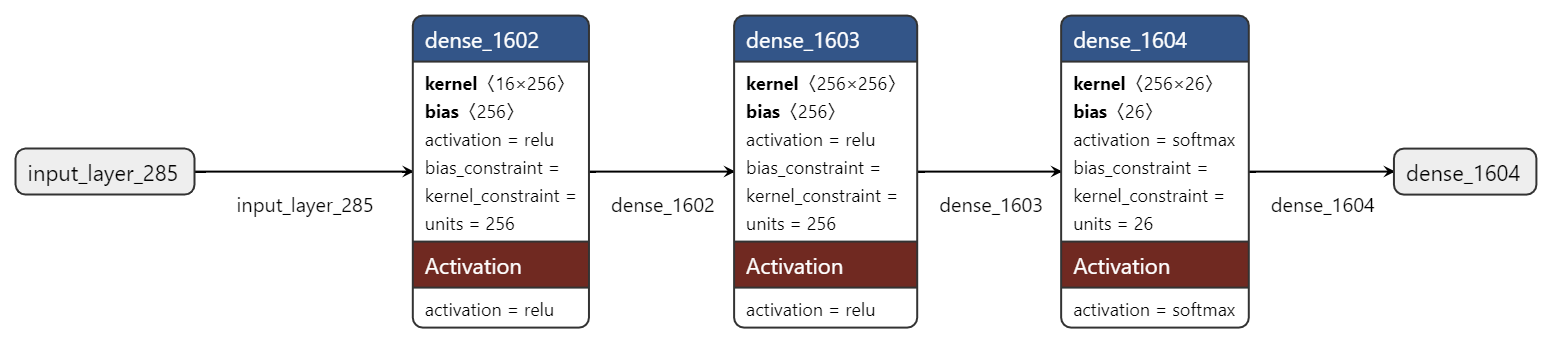

##### 2. Custom Visualizer with ANN Visualizer
###### pip install ann_visualizer
###### pip install graphviz
###### pip install networkx

In [63]:
## get model layers
from tensorflow.keras.models import load_model
model = load_model('model.h5')
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}")
    print(f"  Type: {type(layer)}")
    if hasattr(layer, 'input_shape'):
        print(f"  Input shape: {layer.input_shape}")
    if hasattr(layer, 'output_shape'):
        print(f"  Output shape: {layer.output_shape}")
    if hasattr(layer, 'activation'):
        print(f"  Activation: {layer.activation}")
    print("-" * 40)

Layer 0: dense_435
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Activation: <function relu at 0x0000017291AE5BC0>
----------------------------------------
Layer 1: dense_436
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Activation: <function relu at 0x0000017291AE5BC0>
----------------------------------------
Layer 2: dense_437
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Activation: <function softmax at 0x0000017289D87E20>
----------------------------------------


In [64]:
## extract number of layers with number of neurons
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}")
    print(f"  Type: {type(layer)}")
    if hasattr(layer, 'units'):  # For Dense layers
        print(f"  Number of Neurons: {layer.units}")
    if hasattr(layer, 'activation'):
        print(f"  Activation: {layer.activation}")
    print("-" * 40)

Layer 0: dense_435
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Number of Neurons: 256
  Activation: <function relu at 0x0000017291AE5BC0>
----------------------------------------
Layer 1: dense_436
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Number of Neurons: 256
  Activation: <function relu at 0x0000017291AE5BC0>
----------------------------------------
Layer 2: dense_437
  Type: <class 'keras.src.layers.core.dense.Dense'>
  Number of Neurons: 26
  Activation: <function softmax at 0x0000017289D87E20>
----------------------------------------


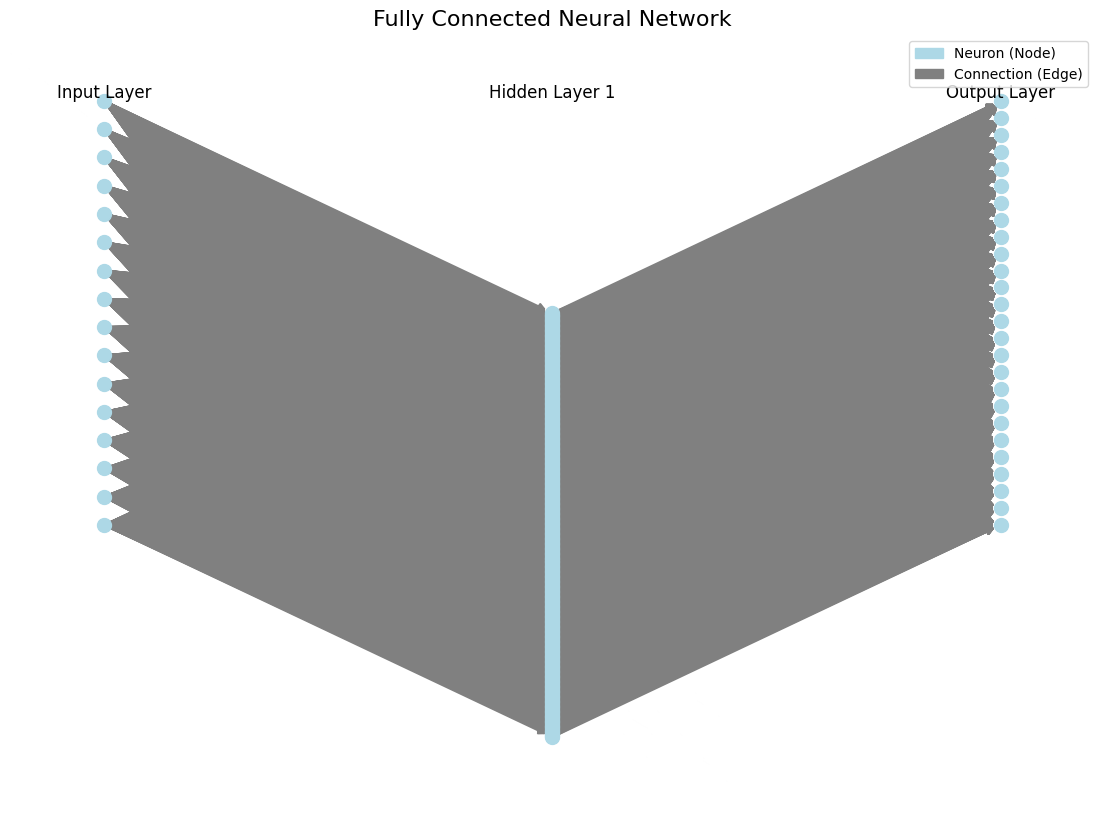

In [65]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

def visualize_fcnn(layers, vertical_spacing=3, horizontal_spacing=3, node_size=500):
    G = nx.DiGraph()
    pos = {}  # Store positions of nodes for plotting

    # Calculate the total vertical space available
    max_neurons = max(layers)
    total_height = (max_neurons - 1) * vertical_spacing

    # Determine the y-offset based on the number of neurons in each layer
    for i, n_neurons in enumerate(layers):
        layer_height = (n_neurons - 1) * vertical_spacing
        y_start = (total_height - layer_height) / 2

        for j in range(n_neurons):
            node_name = f'L{i}_N{j}'
            G.add_node(node_name)

            # Position each node to take up the full vertical space for input and output layers
            if i == 0 or i == len(layers) - 1:
                pos[node_name] = (i * horizontal_spacing, total_height / 2 - j * (total_height / (n_neurons - 1) if n_neurons > 1 else 0))
            else:
                pos[node_name] = (i * horizontal_spacing, y_start - j * vertical_spacing)

            # Connect to previous layer
            if i > 0:
                for k in range(layers[i - 1]):
                    G.add_edge(f'L{i-1}_N{k}', node_name)

    # Create a custom figure and axis
    fig, ax = plt.subplots(figsize=(14, 10))

    # Draw the nodes and edges
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_size=node_size,
        node_color='lightblue',
        edge_color='gray',
        width=1.5,
        ax=ax
    )

    # Add annotations for layers
    for i, n_neurons in enumerate(layers):
        layer_label = "Input Layer" if i == 0 else ("Output Layer" if i == len(layers) - 1 else f"Hidden Layer {i}")
        x_center = i * horizontal_spacing
        y_center = total_height / 2 + vertical_spacing * 2
        ax.text(x_center, y_center, layer_label, fontsize=12, ha='center', color='black')

    # Add legend
    legend_elements = [
        mpatches.Patch(color='lightblue', label='Neuron (Node)'),
        mpatches.Patch(color='gray', label='Connection (Edge)')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    # Set title and remove axes
    ax.set_title("Fully Connected Neural Network", fontsize=16)
    ax.axis('off')

    # Show the plot
    plt.show()

# Define the updated FCNN structure
layers = [16, 256, 26]  # Input layer (16), 1 hidden layer (256), output layer (26 for letters A-Z)

# Visualize the FCNN
visualize_fcnn(layers, vertical_spacing=3, horizontal_spacing=5, node_size=100)
